## 3.3 美国失业率
### 3.3.1 单变量时间序列模型

In [1]:
da <- read.table("data/m-unrate.txt", header = T)
dim(da)
head(da)

[1] 753   4

Year,mon,dd,rate
1948,1,1,3.4
1948,2,1,3.8
1948,3,1,4.0
1948,4,1,3.9
1948,5,1,3.5
1948,6,1,3.6


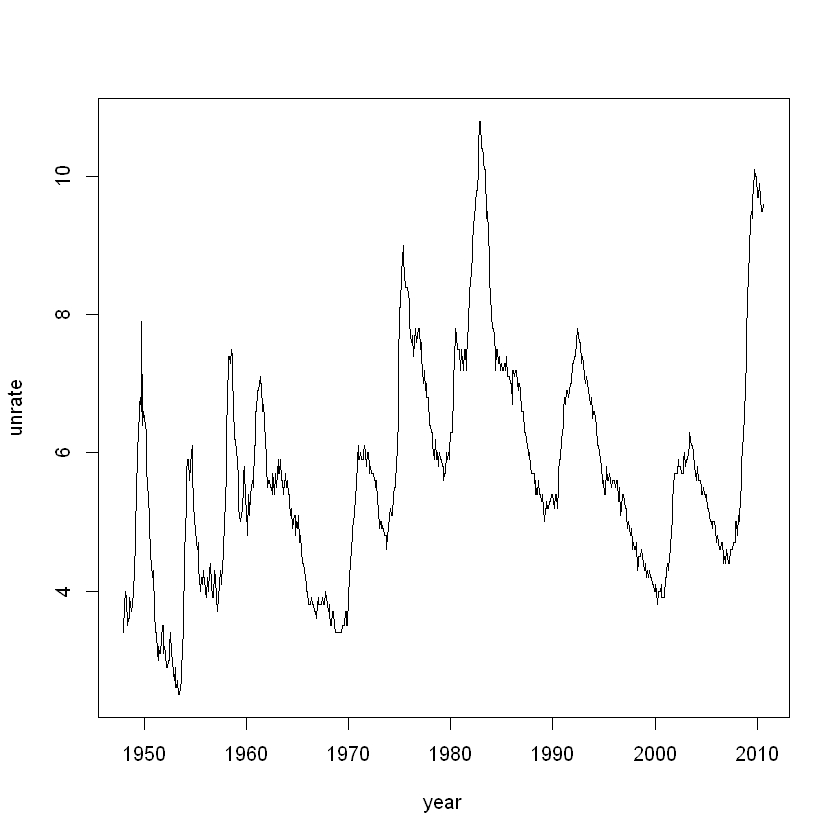

In [2]:
unemp <- da$rate
unrate <- ts(unemp, frequency = 12, start = c(1948, 1))
plot(unrate, xlab = "year", ylab = "unrate", type = "l")

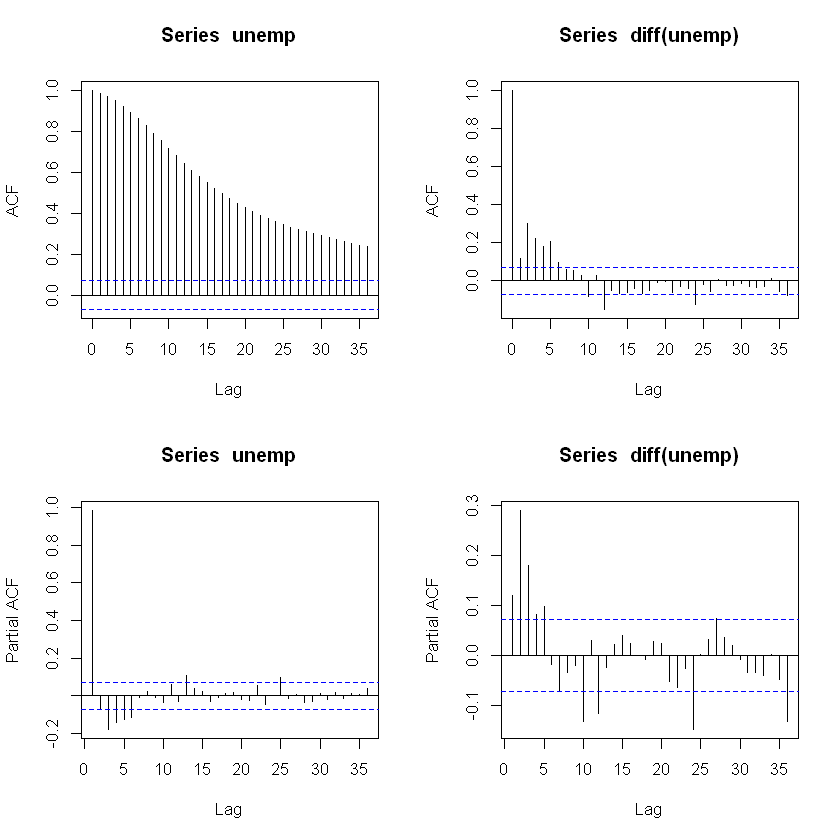

In [3]:
par(mfcol = c(2, 2))
acf(unemp, lag = 36)
pacf(unemp, lag = 36)
acf(diff(unemp), lag = 36)
pacf(diff(unemp), lag = 36)

In [4]:
m1 <- arima(unemp, order = c(1, 1, 5), seasonal = list(order = c(1, 0, 1), period = 12))
m1


Call:
arima(x = unemp, order = c(1, 1, 5), seasonal = list(order = c(1, 0, 1), period = 12))

Coefficients:
         ar1      ma1     ma2     ma3     ma4     ma5    sar1     sma1
      0.7301  -0.7468  0.2194  0.0073  0.0383  0.0831  0.5978  -0.8469
s.e.  0.0686   0.0776  0.0462  0.0501  0.0467  0.0431  0.0672   0.0477

sigma^2 estimated as 0.03643:  log likelihood = 176.43,  aic = -334.87

<span class="mark">这里的季节模型是如何确定的。</span>

In [5]:
c1 <- c(NA, NA, NA, 0, 0, NA, NA, NA)
m1 <- arima(unemp, order = c(1, 1, 5), seasonal = list(order = c(1, 0, 1), period = 12), fixed = c1)
m1


Call:
arima(x = unemp, order = c(1, 1, 5), seasonal = list(order = c(1, 0, 1), period = 12), 
    fixed = c1)

Coefficients:
         ar1      ma1     ma2  ma3  ma4     ma5    sar1     sma1
      0.7536  -0.7744  0.2351    0    0  0.0990  0.6051  -0.8525
s.e.  0.0569   0.0650  0.0365    0    0  0.0386  0.0654   0.0457

sigma^2 estimated as 0.03649:  log likelihood = 175.75,  aic = -337.5

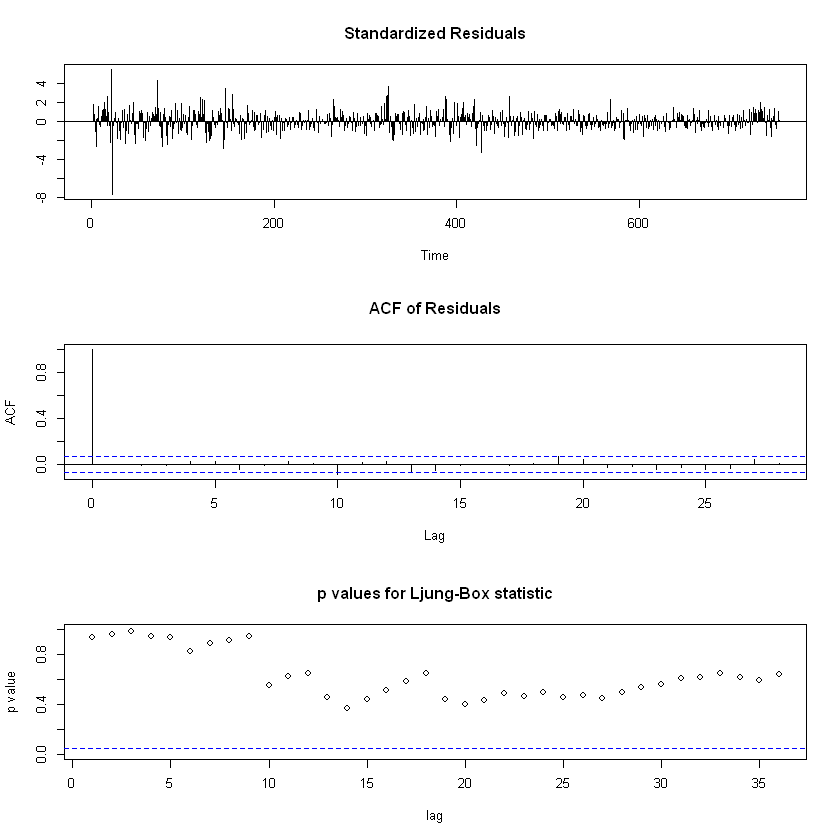

In [6]:
tsdiag(m1, gof = 36)

In [7]:
Box.test(m1$residuals, lag = 24, type = "Ljung")


	Box-Ljung test

data:  m1$residuals
X-squared = 23.349, df = 24, p-value = 0.4993


In [8]:
Box.test(m1$residuals, lag = 36, type = "Ljung")


	Box-Ljung test

data:  m1$residuals
X-squared = 32.459, df = 36, p-value = 0.6378


<span class="mark">Ljung-Box模型的检验的lag参数如何确定。</span>

### 3.3.2 一个替代模型

In [9]:
mm <- arima(unemp, order = c(0, 1, 0), seasonal = list(order = c(1, 0, 1), period = 12))
mm


Call:
arima(x = unemp, order = c(0, 1, 0), seasonal = list(order = c(1, 0, 1), period = 12))

Coefficients:
        sar1     sma1
      0.6195  -0.8670
s.e.  0.0658   0.0468

sigma^2 estimated as 0.04267:  log likelihood = 116.9,  aic = -227.8

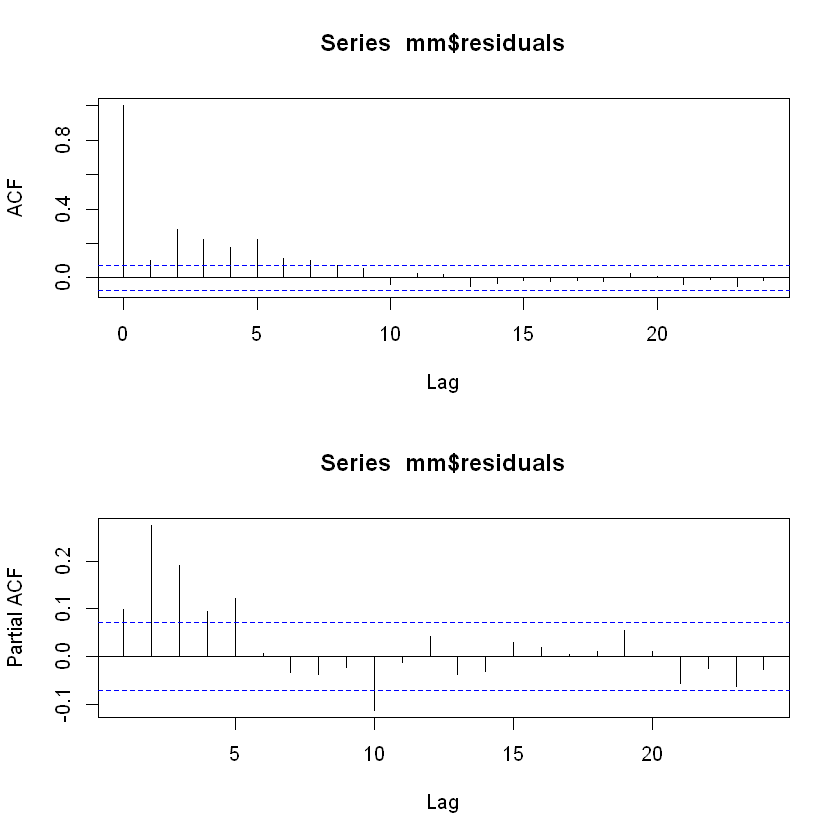

In [10]:
par(mfcol = c(2, 1))
acf(mm$residuals, lag = 24)
pacf(mm$residuals, lag = 24)

In [11]:
mm1 <- arima(unemp, order = c(5, 1, 0), seasonal = list(order = c(1, 0, 1), period = 12))
mm1


Call:
arima(x = unemp, order = c(5, 1, 0), seasonal = list(order = c(1, 0, 1), period = 12))

Coefficients:
          ar1     ar2     ar3     ar4     ar5    sar1     sma1
      -0.0124  0.2101  0.1682  0.1024  0.1207  0.5624  -0.8233
s.e.   0.0365  0.0366  0.0366  0.0370  0.0366  0.0723   0.0526

sigma^2 estimated as 0.03663:  log likelihood = 174.57,  aic = -333.13

In [12]:
cc1 <- c(0, NA, NA, NA, NA, NA, NA)
mm1 <- arima(unemp, order = c(5, 1, 0), seasonal = list(order = c(1, 0, 1), period = 12))
mm1


Call:
arima(x = unemp, order = c(5, 1, 0), seasonal = list(order = c(1, 0, 1), period = 12))

Coefficients:
          ar1     ar2     ar3     ar4     ar5    sar1     sma1
      -0.0124  0.2101  0.1682  0.1024  0.1207  0.5624  -0.8233
s.e.   0.0365  0.0366  0.0366  0.0370  0.0366  0.0723   0.0526

sigma^2 estimated as 0.03663:  log likelihood = 174.57,  aic = -333.13

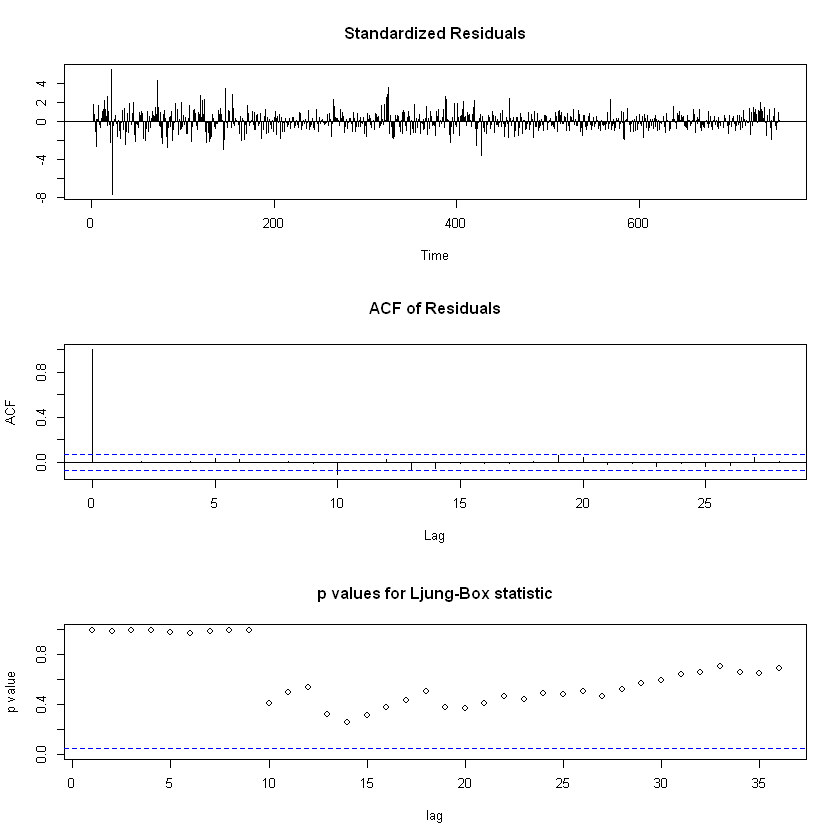

In [13]:
tsdiag(mm1, gof = 36)

### 3.3.3 模型比较

In [14]:
source("backtest.R")
pm1 <- backtest(m1, unemp, 700, 1, fixed = c1, inc.mean = F)

[1] "RMSE of out-of-sample forecasts"
[1] 0.1662391
[1] "Mean absolute error of out-of-sample forecasts"
[1] 0.1349363


In [18]:
pmm1 <- backtest(mm1, unemp, 700, 1, fixed = cc1, inc.mean = F)

Warning message in arima(x, order = regor, seasonal = seaor, xreg = NULL, fixed = fixed, :
"some AR parameters were fixed: setting transform.pars = FALSE"Warning message in arima(x, order = regor, seasonal = seaor, xreg = NULL, fixed = fixed, :
"some AR parameters were fixed: setting transform.pars = FALSE"Warning message in arima(x, order = regor, seasonal = seaor, xreg = NULL, fixed = fixed, :
"some AR parameters were fixed: setting transform.pars = FALSE"Warning message in arima(x, order = regor, seasonal = seaor, xreg = NULL, fixed = fixed, :
"some AR parameters were fixed: setting transform.pars = FALSE"Warning message in arima(x, order = regor, seasonal = seaor, xreg = NULL, fixed = fixed, :
"some AR parameters were fixed: setting transform.pars = FALSE"Warning message in arima(x, order = regor, seasonal = seaor, xreg = NULL, fixed = fixed, :
"some AR parameters were fixed: setting transform.pars = FALSE"Warning message in arima(x, order = regor, seasonal = seaor, xreg = NULL, fi

[1] "RMSE of out-of-sample forecasts"
[1] 0.1679285
[1] "Mean absolute error of out-of-sample forecasts"
[1] 0.1350412
